## Generating Two Classes of Random Points in a 2D Plane

Two classes of random points are generated in a 2D plane using NumPy. Each class contains 1000 points, represented as `(x, y)` coordinates.

### Explanation

- The `negative_samples` are generated around the mean `[0, 3]`, creating a distribution of points in the upper region of the plane.
- The `positive_samples` are generated around the mean `[3, 0]`, creating a distribution of points in the rightmost region of the plane.
- The covariance matrix controls the spread and orientation of the generated points, influencing their arrangement and density.

This process generates synthetic data for two classes, each containing **1000 points** with coordinates `(x, y)` in a 2D plane. The location and distribution of points are defined by the means and covariance matrix used during generation.


In [3]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

## Stacking the Two Classes into an Array with Shape

The provided code uses the `vstack` function to vertically stack the `negative_samples` and `positive_samples` arrays, effectively combining the points from both classes into a single array called `inputs`.

The resulting `inputs` array has a shape of `(2000, 2)`, indicating that it encompasses a total of 2000 points, with each point represented by `(x, y)` coordinates in a 2D plane.


In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

## Creating Target Labels for the Two Classes

The code generates target labels for the two classes of points using NumPy's `vstack` function. These labels are essential for supervised learning tasks, where each point is associated with a class label.

The resulting `targets` array is created by vertically stacking two arrays:
- The first array contains zeros, representing the negative class.
- The second array contains ones, representing the positive class.

The `targets` array has a shape of `(2000, 1)`, corresponding to the 2000 points generated earlier. Each entry in the array indicates the class label (0 or 1) for the corresponding point in the `inputs` array.


In [5]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))

## Visualizing Classes with Scatter Plot

The code uses Matplotlib's `scatter` function to create a scatter plot. Points from the `inputs` array are plotted based on their `(x, y)` coordinates, and their color is determined by the corresponding values in the `targets` array. This visualization visually separates the two classes of points in the 2D plane.

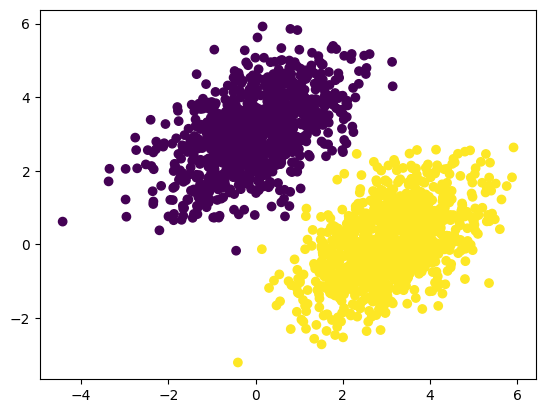

In [6]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## Initializing Weights and Bias

This code snippet uses TensorFlow to initialize weights and bias for a neural network layer.

- `input_dim` represents the dimension of the input, which in this case is 2. It corresponds to the `(x, y)` coordinates of the 2D points.
- `output_dim` is the dimension of the output, which is 1. It represents a single score that the neural network aims to predict.

The weight matrix `W` is initialized with random values in the shape of `(input_dim, output_dim)`. This matrix will transform the input data.

The bias vector `b` is initialized with zeros in the shape of `(output_dim,)`. The bias is an added term that affects the transformed input.


In [7]:
import tensorflow as tf

input_dim = 2
output_dim = 1

W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))

b = tf.Variable(tf.zeros(shape=(output_dim,)))

2023-08-24 16:08:13.173150: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 16:08:13.622327: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 16:08:13.690114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 16:08:15.726879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Forward Pass Function

The `model` function takes `inputs` as its argument. These inputs are typically 2D points represented as `(x, y)` coordinates.

Within the function, the transformation is performed using matrix multiplication (`tf.matmul`) of the inputs with the previously initialized weight matrix `W`. The bias vector `b` is added to the result.

The output of this model function is a score that the neural network predicts based on the input points. This process contributes to the decision-making and classification capabilities of the network.

In [8]:
def model (inputs):
    return tf.matmul(inputs, W) + b

## The Mean Squared Error Loss Function

The `square_loss` function takes two arguments, `targets` and `predictions`. These represent the target values (actual outcomes) and the predicted values, respectively.

Within the function, per-sample losses are computed by squaring the difference between the `targets` and `predictions`. This calculates the squared error for each individual sample.

The function then returns the mean of these per-sample losses using `tf.reduce_mean`. This mean value represents the average squared difference between the targets and predictions and serves as a measure of how well the model's predictions match the actual targets.

In [9]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

## Training Step Function

- `learning_rate` is a predefined value that determines the step size for parameter updates.

- The `training_step` function takes `inputs` and `targets` as arguments. These represent the input data (2D points) and the corresponding target labels (0 or 1).

- Within the function, a gradient tape is used to compute gradients with respect to the model's parameters during the forward pass.

- Predictions are calculated by passing the `inputs` through the model.

- The loss is computed using the previously defined `square_loss` function, measuring the difference between `targets` and `predictions`.

- Gradients of the loss with respect to `W` and `b` are obtained using the tape.

- The `W` and `b` parameters are updated using gradient descent: `W` is updated by subtracting the product of gradients and `learning_rate`, and the same is done for `b`.

- The function returns the calculated loss, which indicates how well the model's predictions match the actual targets. This training step aims to adjust the model's parameters to minimize this loss, improving the model's performance over time.

In [10]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

## Batch Training Loop
- The `for` loop iterates over a predefined number of steps (40 in this case), indicating the number of iterations the training process will undergo.

- In each step, the `training_step` function is called with `inputs` and `targets` to perform a training update. This function computes the loss, adjusts the model's parameters, and returns the loss value.

- The `loss` variable captures the loss value computed during the training step.

- The `print` statement displays the loss at the current step using formatted output, showing the step number and the corresponding loss value.

This loop repetitively performs training steps, adjusting the model's parameters to minimize the loss over multiple iterations. Monitoring the loss helps gauge the model's improvement during the training process.

In [11]:
for step in range(40):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 0.7216
Loss at step 1: 0.2020
Loss at step 2: 0.1136
Loss at step 3: 0.0944
Loss at step 4: 0.0866
Loss at step 5: 0.0810
Loss at step 6: 0.0762
Loss at step 7: 0.0718
Loss at step 8: 0.0677
Loss at step 9: 0.0640
Loss at step 10: 0.0607
Loss at step 11: 0.0576
Loss at step 12: 0.0547
Loss at step 13: 0.0521
Loss at step 14: 0.0498
Loss at step 15: 0.0476
Loss at step 16: 0.0456
Loss at step 17: 0.0438
Loss at step 18: 0.0421
Loss at step 19: 0.0405
Loss at step 20: 0.0391
Loss at step 21: 0.0378
Loss at step 22: 0.0367
Loss at step 23: 0.0356
Loss at step 24: 0.0346
Loss at step 25: 0.0337
Loss at step 26: 0.0328
Loss at step 27: 0.0321
Loss at step 28: 0.0314
Loss at step 29: 0.0307
Loss at step 30: 0.0301
Loss at step 31: 0.0296
Loss at step 32: 0.0291
Loss at step 33: 0.0287
Loss at step 34: 0.0282
Loss at step 35: 0.0279
Loss at step 36: 0.0275
Loss at step 37: 0.0272
Loss at step 38: 0.0269
Loss at step 39: 0.0266


## Visualizing Model Predictions
- `predictions` are computed by passing the `inputs` through the trained `model`.

- Matplotlib's `scatter` function is used to create a scatter plot. Each point's x-coordinate is taken from the first column of the `inputs` array, and the y-coordinate is taken from the second column. The color of each point is determined by whether the corresponding prediction value is greater than 0.5.

- Points with predictions above 0.5 are assigned one color, while those with predictions below 0.5 are assigned another color.

This visualization allows you to observe how the model's predictions divide the input points into two classes based on the 0.5 threshold.

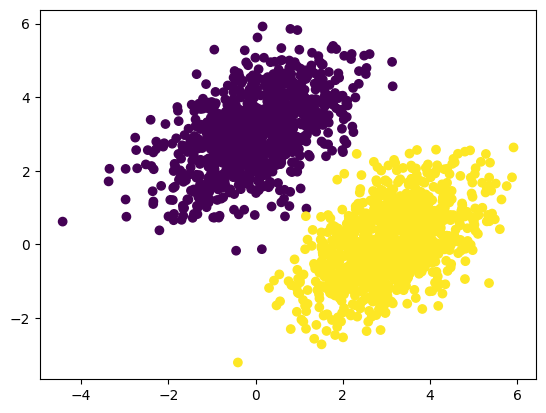

In [12]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## Decision Boundary Visualization

- An array `x` is generated using `np.linspace`, representing a range of x-values from -1 to 4. This will be used to plot the decision boundary line.

- The equation `y = -W[0] / W[1] * x + (0.5 - b) / W[1]` is used to calculate the corresponding y-values for the decision boundary line. The `W` and `b` values come from the trained model.

- Matplotlib's `plot` function is used to plot the decision boundary line (`x` vs. `y`) using a red solid line (`-r`).

- The `scatter` function is then used to create a scatter plot of the input points, where each point's color is determined by whether the corresponding prediction value is greater than 0.5.

This visualization overlays the decision boundary line on the scatter plot of the input points, helping to visualize how the model classifies the data points based on its predictions.

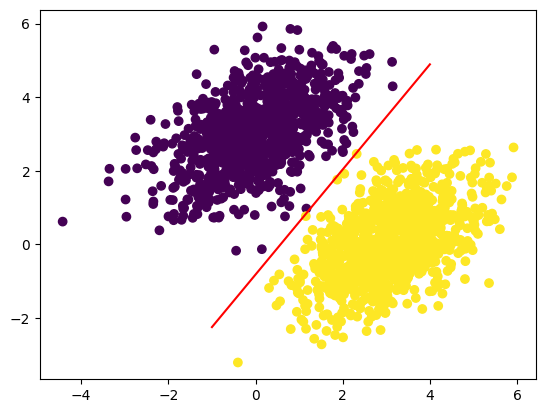

In [17]:
x = np.linspace(-1, 4, 100)

y = -W[0] / W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, '-r')

plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

